In [33]:
#Clickstream Preprocessing

In [42]:
# -------------------------------
# 1. Import Required Libraries
# -------------------------------
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# -------------------------------
# 2. Load the Dataset (with correct separator)
# -------------------------------
train_df = pd.read_csv("D:/guviprojects/clickstream1/train_data (2).csv", sep=',')
test_df = pd.read_csv("D:/guviprojects/clickstream1/test_data (2).csv", sep=',')

# Clean column names
train_df.columns = train_df.columns.str.strip().str.lower()
test_df.columns = test_df.columns.str.strip().str.lower()

# Add 'source' column to identify origin
train_df['source'] = 'train'
test_df['source'] = 'test'

# -------------------------------
# 3. Combine for Uniform Processing
# -------------------------------
df = pd.concat([train_df, test_df], ignore_index=True)

# -------------------------------
# 4. Convert Numeric Columns Properly
# -------------------------------
expected_numeric = ['year', 'month', 'day', 'order', 'country', 'session_id',
                    'colour', 'location', 'model_photography', 'price', 'price_2', 'page']
for col in expected_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------------
# 5. Handle Missing Values
# -------------------------------
# Numeric columns → median
df[expected_numeric] = df[expected_numeric].fillna(df[expected_numeric].median())

# Categorical columns → mode
categorical_cols = df.select_dtypes(include='object').drop(columns=['source']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# -------------------------------
# 6. Encode Categorical Variables
# -------------------------------
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# -------------------------------
# 7. Feature Scaling (MinMaxScaler for numeric)
# -------------------------------
scaler = MinMaxScaler()
df[expected_numeric] = scaler.fit_transform(df[expected_numeric])

# -------------------------------
# 8. Separate Train and Test Sets
# -------------------------------
train_df_processed = df[df['source'] == 'train'].drop(columns=['source']).reset_index(drop=True)
test_df_processed = df[df['source'] == 'test'].drop(columns=['source']).reset_index(drop=True)

# -------------------------------
# 9. Output shapes
# -------------------------------
print("Preprocessing complete.")
print("Processed Train shape:", train_df_processed.shape)
print("Processed Test shape:", test_df_processed.shape)


Preprocessing complete.
Processed Train shape: (132379, 14)
Processed Test shape: (33095, 14)


In [31]:
import pandas as pd
import numpy as np

# 1. Load the dataset using the correct path and delimiter
train_df = pd.read_csv("D:/guviprojects/clickstream1/train_data (2).csv", sep=',')
test_df = pd.read_csv("D:/guviprojects/clickstream1/test_data (2).csv", sep=',')

# 2. Clean column names
train_df.columns = train_df.columns.str.strip().str.lower()
test_df.columns = test_df.columns.str.strip().str.lower()

# 3. Combine train and test for consistent preprocessing
df = pd.concat([train_df, test_df], keys=['train', 'test'])

# 4. Handle missing values
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# 5. Show result
print("Preprocessing complete.")
print("Columns:", df.columns.tolist())
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Preprocessing complete.
Columns: ['year', 'month', 'day', 'order', 'country', 'session_id', 'page1_main_category', 'page2_clothing_model', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page']
Train shape: (132379, 14)
Test shape: (33095, 14)


In [46]:
# Step-by-Step EDA Code for Clickstream Data


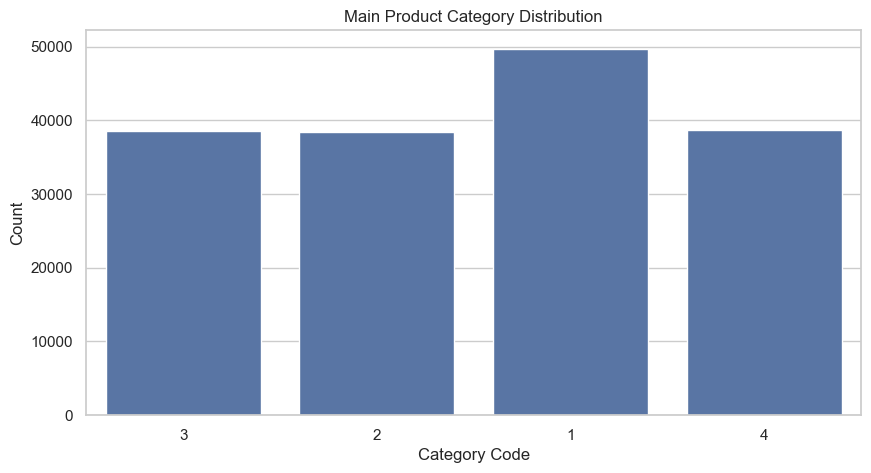

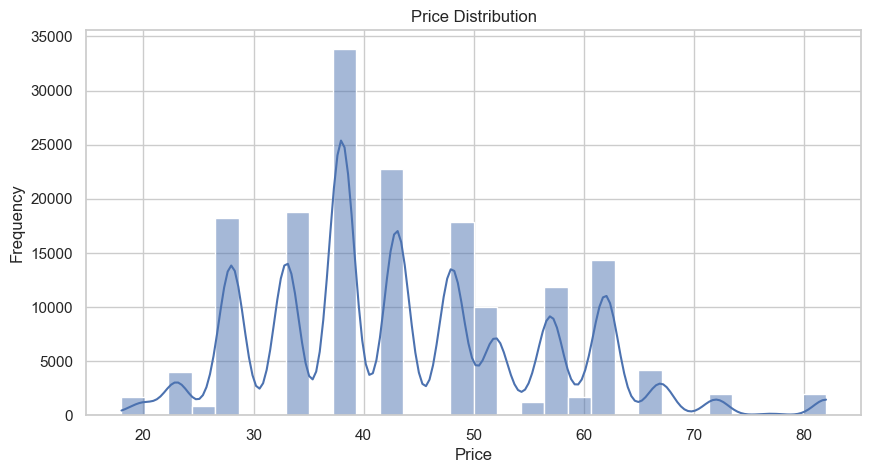

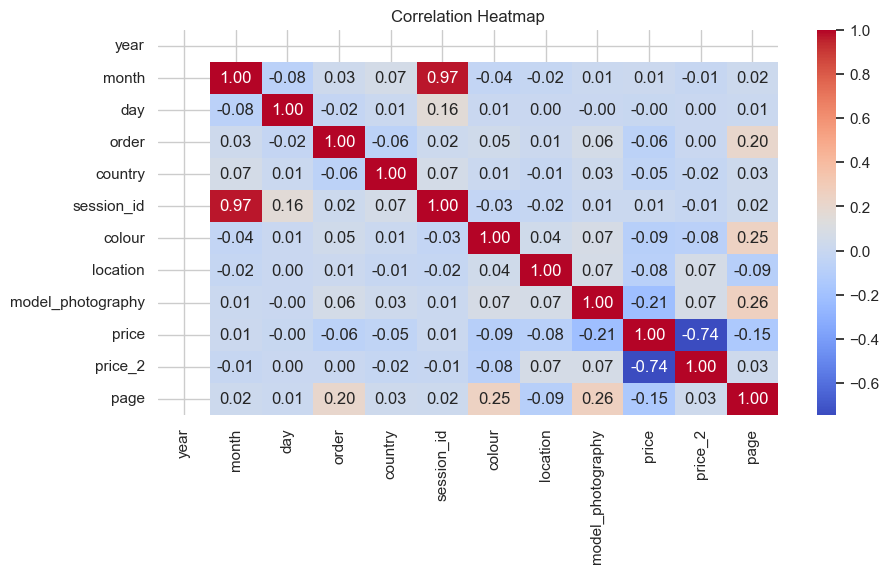

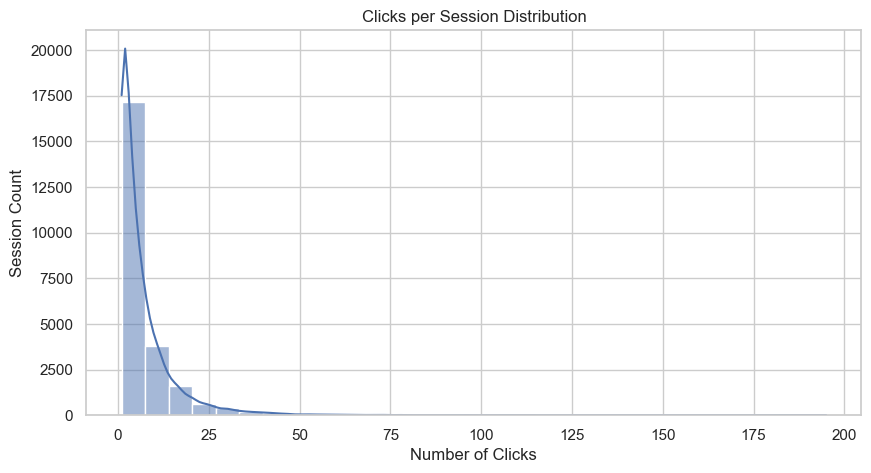

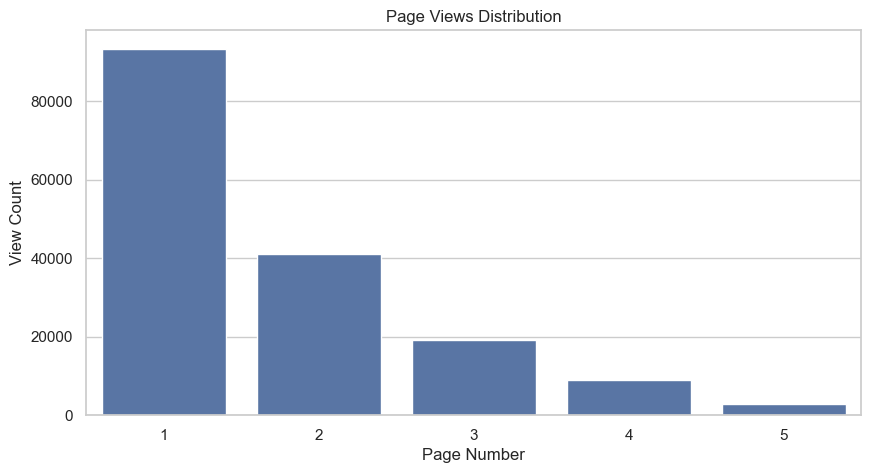

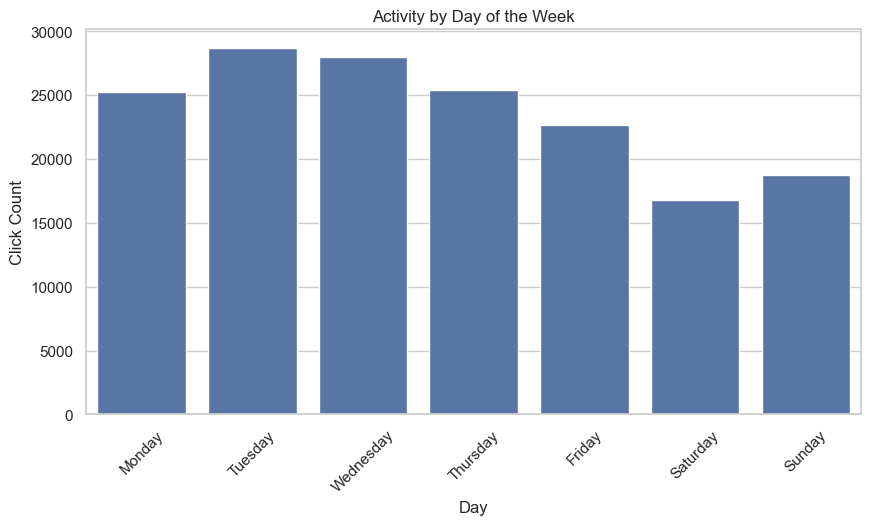

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# -------------------------------
# 1. Load CSV (semicolon-delimited) and preprocess date columns
# -------------------------------
train_df = pd.read_csv("D:/guviprojects/clickstream1/train_data (2).csv", sep=';')
test_df = pd.read_csv("D:/guviprojects/clickstream1/test_data (2).csv", sep=';')

# Fix column headers if combined
if train_df.columns[0].startswith("year,"):
    train_df = train_df[train_df.columns[0]].str.split(",", expand=True)
    test_df = test_df[test_df.columns[0]].str.split(",", expand=True)

# Rename columns for clarity
train_df.columns = ['year', 'month', 'day', 'order', 'country', 'session_id',
                    'page1_main_category', 'page2_clothing_model', 'colour', 'location',
                    'model_photography', 'price', 'price_2', 'page']
test_df.columns = train_df.columns

# Combine for EDA
df = pd.concat([train_df, test_df], ignore_index=True)

# Convert to appropriate data types
for col in ['year', 'month', 'day', 'order', 'country', 'session_id',
            'colour', 'location', 'model_photography', 'price', 'price_2', 'page']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# -------------------------------
# 2. Bar Plot: Main Product Category
# -------------------------------
plt.figure()
sns.countplot(data=df, x='page1_main_category')
plt.title("Main Product Category Distribution")
plt.xlabel("Category Code")
plt.ylabel("Count")
plt.show()

# -------------------------------
# 3. Histogram: Price
# -------------------------------
plt.figure()
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# 4. Correlation Heatmap
# -------------------------------
plt.figure()
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# 5. Clicks per Session
# -------------------------------
session_clicks = df.groupby('session_id')['order'].count().reset_index(name='click_count')
plt.figure()
sns.histplot(session_clicks['click_count'], bins=30, kde=True)
plt.title("Clicks per Session Distribution")
plt.xlabel("Number of Clicks")
plt.ylabel("Session Count")
plt.show()

# -------------------------------
# 6. Page Views
# -------------------------------
plt.figure()
sns.countplot(data=df, x='page')
plt.title("Page Views Distribution")
plt.xlabel("Page Number")
plt.ylabel("View Count")
plt.show()

# -------------------------------
# 7. Time-based Features and Plot
# -------------------------------
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
df['day_of_week'] = df['date'].dt.day_name()

plt.figure()
sns.countplot(data=df, x='day_of_week',
              order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Activity by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Click Count")
plt.xticks(rotation=45)
plt.show()


In [55]:
#Feature Engineering

In [57]:
# -------------------------------
# 1. Group by Session for Feature Creation
# -------------------------------
session_df = df.copy()

# Ensure correct order before computing differences
session_df = session_df.sort_values(by=['session_id', 'order'])

# -------------------------------
# 3.1. Session Metrics
# -------------------------------

# a) Total clicks per session (session length)
session_clicks = session_df.groupby('session_id')['order'].count().rename('click_count')

# b) Unique categories viewed per session
unique_categories = session_df.groupby('session_id')['page1_main_category'].nunique().rename('unique_categories')

# c) Session duration (order difference as time proxy)
session_df['order_diff'] = session_df.groupby('session_id')['order'].diff().fillna(0)
session_duration = session_df.groupby('session_id')['order_diff'].sum().rename('session_duration')

# d) Total price viewed
session_total_price = session_df.groupby('session_id')['price'].sum().rename('total_price_viewed')


# -------------------------------
# 3.2. Clickstream Patterns
# -------------------------------

# a) Click path string
click_path = session_df.groupby('session_id')['page2_clothing_model'].apply(
    lambda x: ' > '.join(x.astype(str))
).rename('click_path')

# b) Unique products viewed
unique_products = session_df.groupby('session_id')['page2_clothing_model'].nunique().rename('unique_products')


# -------------------------------
# 3.3 Behavioral Metrics
# -------------------------------

# a) Bounce rate (1 if only 1 click)
session_df['is_bounce'] = session_df.groupby('session_id')['order'].transform('count') == 1
bounce_rate = session_df.groupby('session_id')['is_bounce'].max().rename('is_bounce').astype(int)

# b) Exit page
exit_page = session_df.groupby('session_id')['page'].last().rename('exit_page')

# c) Revisited product count
revisit_counts = session_df.groupby(['session_id', 'page2_clothing_model']).size().reset_index(name='visit_count')
revisits = revisit_counts[revisit_counts['visit_count'] > 1].groupby('session_id').size().rename('revisited_products')

# Fill 0 for sessions with no revisits
revisits = session_df[['session_id']].drop_duplicates().merge(
    revisits, on='session_id', how='left'
).set_index('session_id').fillna(0)


# -------------------------------
# 3.4. Combine All Session Features
# -------------------------------
session_features = pd.concat([
    session_clicks,
    unique_categories,
    session_duration,
    session_total_price,
    click_path,
    unique_products,
    bounce_rate,
    exit_page,
    revisits
], axis=1)

# Final output
session_features.reset_index(inplace=True)


In [58]:
print(session_features.head())


   session_id  click_count  unique_categories  session_duration  \
0           1            9                  4               8.0   
1           2           10                  3               9.0   
2           3            6                  3               5.0   
3           4            4                  2               3.0   
4           5            1                  1               0.0   

   total_price_viewed                                         click_path  \
0                 379  A13 > A16 > B4 > B17 > B8 > C56 > C57 > P67 > P82   
1                 500  B31 > B21 > B24 > B27 > A10 > A10 > B27 > P1 >...   
2                 253                    B17 > C4 > C7 > C10 > C17 > P77   
3                 181                               A34 > A37 > C4 > C25   
4                  57                                                C21   

   unique_products  is_bounce  exit_page  revisited_products  
0                9          0          5                 0.0  
1             

In [31]:
#4: Balancing Techniques for Classification Models

d:\guviprojects\clickstream1\env\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


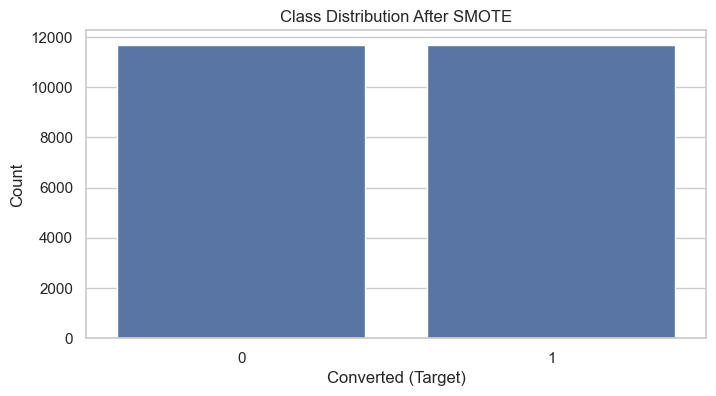

In [64]:
# -------------------------------
# 4. Simulate Target Column ('converted')
# -------------------------------
# Let's simulate converted = 1 for click_count > 5
session_features['converted'] = (session_features['click_count'] > 5).astype(int)

# -------------------------------
# 5. Prepare for Classification & Balancing
# -------------------------------
# Drop non-numeric features
session_features = session_features.drop(columns=['click_path'])

# Handle missing values if any
session_features.fillna(0, inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
features_to_scale = ['click_count', 'unique_categories', 'session_duration', 'total_price_viewed',
                     'unique_products', 'revisited_products']
session_features[features_to_scale] = scaler.fit_transform(session_features[features_to_scale])

# Features and Target
X = session_features.drop(columns=['session_id', 'converted'])
y = session_features['converted']

# -------------------------------
# 6. Train-Test Split & SMOTE
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# -------------------------------
# 7. Check Resampled Distribution
# -------------------------------
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Converted (Target)")
plt.ylabel("Count")
plt.show()

In [63]:
print(train_df.columns.tolist())
train_df.head()



['year', 'month', 'day', 'order', 'country', 'session_id', 'page1_main_category', 'page2_clothing_model', 'colour', 'location', 'model_photography', 'price', 'price_2', 'page']


,year,month,day,order,country,session_id,page1_main_category,page2_clothing_model,colour,location,model_photography,price,price_2,page
0,2008,6,22,21,29,15648,3,C20,13,1,2,48,1,2
1,2008,5,19,6,29,10018,2,B26,13,3,1,57,1,2
2,2008,7,15,2,29,19388,3,C13,9,5,1,48,1,1
3,2008,5,2,2,29,7181,2,B11,2,4,1,43,2,1
4,2008,6,9,16,29,13493,2,B31,9,5,1,57,1,2


In [65]:
# Step-by-step code: Model Building & Pipeline Development


In [68]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.cluster import KMeans

# Step 2: Use Preprocessed Session-Level Data
# Assume session_features is already defined and includes 'converted' and 'price' columns

df = session_features.copy()

# Check available columns
print("Available columns:", df.columns.tolist())

# ----------------------------
# Step 3: Classification Task
# ----------------------------
# Target: converted
target_classification = 'converted'

# Drop unnecessary columns safely
X_cls = df.drop(columns=['session_id', 'click_path', target_classification], errors='ignore')
y_cls = df[target_classification]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

clf_pipe.fit(X_train_c, y_train_c)
y_pred_c = clf_pipe.predict(X_test_c)

print("\n--- Classification Report ---")
print(classification_report(y_test_c, y_pred_c))


# ----------------------------
# Step 4: Regression Task
# ----------------------------
# Target: price (or use total_price_viewed if price doesn't exist at session level)
target_regression = 'total_price_viewed'

# Drop safely
X_reg = df.drop(columns=['session_id', 'click_path', target_regression, 'converted'], errors='ignore')
y_reg = df[target_regression]

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
])

reg_pipe.fit(X_train_r, y_train_r)
y_pred_r = reg_pipe.predict(X_test_r)

print("\n--- Regression Metrics ---")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_r, y_pred_r)):.2f}")
print(f"R² Score: {r2_score(y_test_r, y_pred_r):.2f}")


# ----------------------------
# Step 5: Clustering Task
# ----------------------------
# Remove target columns and non-numeric
X_clust = df.drop(columns=['session_id', 'click_path', 'converted', 'total_price_viewed'], errors='ignore')
X_clust = X_clust.select_dtypes(include=np.number).dropna()

# Use KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_clust)

print("\n--- Clustering Completed ---")
print(df['cluster'].value_counts())


Available columns: ['session_id', 'click_count', 'unique_categories', 'session_duration', 'total_price_viewed', 'unique_products', 'is_bounce', 'exit_page', 'revisited_products', 'converted']

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2945
           1       1.00      1.00      1.00      1861

    accuracy                           1.00      4806
   macro avg       1.00      1.00      1.00      4806
weighted avg       1.00      1.00      1.00      4806


--- Regression Metrics ---
RMSE: 0.01
R² Score: 0.98

--- Clustering Completed ---
cluster
0    14306
1     5139
2     4581
Name: count, dtype: int64


In [69]:
#6. Model Evaluation:


--- Classification Metrics ---
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


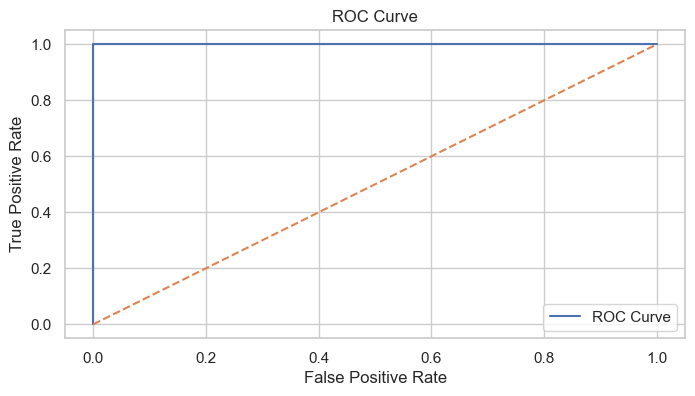


--- Regression Metrics ---
MAE: 8.34561841858667e-16
RMSE: 1.3839471051447988e-15
R² Score: 1.0

--- Clustering Metrics ---
Silhouette Score: 0.5333208530576043
Davies-Bouldin Index: 0.7230147157959367


In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------
# 1. Prepare Data
# -------------------------------
df = session_features.copy()

# Classification target
target_classification = 'converted'

# Regression target
target_regression = 'session_duration'

# Features to use (exclude identifiers, categorical, or leakage)
drop_cols = ['session_id', 'click_path', target_classification, target_regression] if 'click_path' in df.columns else ['session_id', target_classification, target_regression]
X = df.drop(columns=drop_cols, errors='ignore')

# -------------------------------
# 2. Classification
# -------------------------------
X_cls = X.copy()
y_cls = df[target_classification]
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_cls, y_train_cls)
y_pred_cls = clf.predict(X_test_cls)
y_proba_cls = clf.predict_proba(X_test_cls)[:, 1]

# Classification Metrics
print("--- Classification Metrics ---")
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls))
print("Precision:", precision_score(y_test_cls, y_pred_cls))
print("Recall:", recall_score(y_test_cls, y_pred_cls))
print("F1 Score:", f1_score(y_test_cls, y_pred_cls))
print("ROC-AUC:", roc_auc_score(y_test_cls, y_proba_cls))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_cls, y_proba_cls)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------------
# 3. Regression
# -------------------------------
X_reg = X.copy()
y_reg = df[target_regression]
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train_reg, y_train_reg)
y_pred_reg = reg.predict(X_test_reg)

# Regression Metrics
print("\n--- Regression Metrics ---")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))

# -------------------------------
# 4. Clustering
# -------------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

print("\n--- Clustering Metrics ---")
print("Silhouette Score:", silhouette_score(X, clusters))
print("Davies-Bouldin Index:", davies_bouldin_score(X, clusters))


In [74]:
import os
import joblib
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Assume your DataFrame is named df and has 'converted' for classification, 'price' for regression
# Drop unneeded columns
X = df.drop(columns=['session_id', 'converted'])
y_cls = df['converted']
y_reg = df['total_price_viewed']  # replace with your actual regression target if different

# Split datasets
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_cls, test_size=0.2, random_state=42)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Train models
classifier_model = RandomForestClassifier(random_state=42)
classifier_model.fit(X_train_c, y_train_c)

regression_model = RandomForestRegressor(random_state=42)
regression_model.fit(X_train_r, y_train_r)

cluster_model = KMeans(n_clusters=3, random_state=42)
cluster_model.fit(X)

# Save models
os.makedirs("models", exist_ok=True)
joblib.dump(classifier_model, "models/classifier.pkl")
joblib.dump(regression_model, "models/regressor.pkl")
joblib.dump(cluster_model, "models/clusterer.pkl")


['models/clusterer.pkl']

In [75]:
# Save the session-level features to CSV for Streamlit use
session_features.to_csv("session_features.csv", index=False)
